<a href="https://colab.research.google.com/github/ddv246/Lending-Club/blob/master/Copy_of_LendingClub_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA BOOTCAMP**
# **SPRING2020 - COURSE PROJECT**

---



---


# **CREDIT RISK ANALYSIS AND MODELLING**

---




![alt text](https://drive.google.com/uc?id=1loawz9kgpecxysE1fSJ1vTnxs4wt8WUK)

# **TABLE OF CONTENTS**

---


I.   Project Overview

II.   Data

III.   Data Understanding

IV.   Data Cleaning

V.   Exploratory Data Analysis and Data pre-processing










## **I. PROJECT OVERVIEW**

---



---


 
**WHAT IS CREDIT RISK?**

A creditor or the lender provides goods and services to a debtor also known borrowers based on the trust that borrower will repay. When someone fails to repay a loan,it is said to be default.The possiblity that someone who has borrowed money will default is known as Credit Risk.

**WHY IT IS IMPORTANT?**

Lender's inability or failure to estimate borrowers probablity of default can have grave consequences for lenders and the investor.In general, lending to borrowers with a high probability of default is one of the main reasons for serious financial crisis. One such finacial crisis was the global financial crisis in 2008.The main factor that led to the crisis was high default rates of subprime home mortgages. Many big banks like Lehmam Brothers and Bear Stearns went bankrupt thus making credit risk analysis as one of the most important variables in the Financial System of today.

**SCOPE OF THE PROJECT:**

The scope of our project is to estimate credit risk of each borrower as precisely as possible. And In order to do so, We intend to build a detailed analysis of the data and use machine learning models to correctly identifying whether a person, given certain characteristics, has a high likelihood to default on a loan.

There are certain methodology that needs to be followed in order to properly load effective predictors - data cleaning, exploration, and feature engineering.We, then, create three different models,

1. A PD or Probability of Default Model showing the probability of a customer not repaying their debt,
2.  LGD or Loss Given Default Model showing the proportion of an exposure a company loses when a customer defaults 
3. an EAD or Exposure at Default Model showing the total loss in terms of amount of money the bank is exposed to if a customer defaults.

Using this information we'll create a score card.The score cards are identical to the ones bank officers use on a daily basis to accept or reject loan applications. We combine these three models to calculate the total expected loss for the whole portfolio of loans that the bank holds the expected loss.



# **II.Data**


---



---



The dataset is sourced from Kaggle. The data files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. 

Data Source:  https://www.kaggle.com/wendykan/lending-club-loan-data

In [0]:
#When opening in google colab, run this cell to increase RAM usage to 25GB
#a = []
#while(1):
 #   a.append(1)

In [1]:
#If opening in colab run this cell
!git clone https://github.com/ddv246/Lending-Club
%cd Lending-Club

fatal: destination path 'Lending-Club' already exists and is not an empty directory.
/content/Lending-Club


In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **III. Data Understanding**

---



---



---


Description of various columns in the dataset. Importing necessary Libraries and loading the data.


#### **1.Import Libraries:**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **2. Loading the Data**


In [2]:
start_df = pd.read_csv('/content/drive/My Drive/loan_data_2007_2014.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = start_df.copy(deep=True)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **3. Checking Dimensions**


In [4]:
df.shape

(466285, 75)

#### **4. Understanding columns in the Dataframe**

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

####**5. Description of the columns**

In [6]:
df_description = pd.read_excel('LCDataDictionary (1).xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

FileNotFoundError: ignored

# **IV. Data Cleaning**

---



---



#### **1. Parsing loan_status**

In [7]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

#### **2.Removing the columns having more than 90% missing values**

In [9]:
# summarising number of missing values in each column
df.isnull().sum().sort_values()

Unnamed: 0               0
zip_code                 0
addr_state               0
dti                      0
revol_bal                0
                     ...  
open_acc_6m         466285
total_cu_tl         466285
annual_inc_joint    466285
dti_joint           466285
inq_last_12m        466285
Length: 75, dtype: int64

In [10]:
# percentage of missing values in each column
perc=round(df.isnull().sum()/len(df.index), 2)*100
perc=perc.sort_values().tail(30)
perc

purpose                          0.0
verification_status              0.0
title                            0.0
emp_length                       5.0
emp_title                        6.0
tot_cur_bal                     15.0
tot_coll_amt                    15.0
total_rev_hi_lim                15.0
next_pymnt_d                    49.0
mths_since_last_delinq          54.0
desc                            73.0
mths_since_last_major_derog     79.0
mths_since_last_record          87.0
il_util                        100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
inq_fi                         100.0
total_bal_il                   100.0
total_cu_tl                    100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
verification_status_joint      100.0
dti_joint                      100.0
a

We see that many columns have 100% missing values, some have 87%, 79% etc. First, let's get rid of the columns having 100% missing values.

In [11]:
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_columns)

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')


In [12]:
df = df.drop(missing_columns, axis=1)
print(df.shape)

(466285, 58)


Summarise number of missing values again

In [13]:
100*(df.isnull().sum()/len(df.index)).sort_values()

Unnamed: 0                      0.000000
policy_code                     0.000000
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
last_pymnt_amnt                 0.000000
collection_recovery_fee         0.000000
recoveries                      0.000000
total_rec_late_fee              0.000000
total_rec_int                   0.000000
total_rec_prncp                 0.000000
total_pymnt_inv                 0.000000
revol_bal                       0.000000
total_pymnt                     0.000000
out_prncp_inv                   0.000000
url                             0.000000
initial_list_status             0.000000
pymnt_plan                      0.000000
issue_d                         0.000000
id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv 

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### **3. Converting datatypes**
####**a) Employee length (emp_length)**

Employee length is of type object, which we need to be as numeric. Converting them to numeric values

In [15]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [0]:
# Removing years from emp_length
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace('n/a',  str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

In [0]:
#changing emp_length to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [18]:
# simlilarly changing term variable to numeric
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [0]:
df['term'] = df['term'].str.replace('months','')

In [20]:
df['term'] = pd.to_numeric(df['term'])
df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

####**b) Earliest Credit Line (earliest_cr_line)** 

Attributes like 'earliest_cr_line' and 'issue_d' are of type object and are required to be datatype datetime . Thus, cleaning them to be of the required type.

In [21]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [22]:
##Converting to datetime format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

Observing the data, we find that we need to calculate the time since the earlist credit line as passed in the form of months. So, we make use of the  reference date , 2017-12-01, to calculate the time

In [0]:
## We take the reference date and calulate the time since earliest credit line has passed in months
df['month_diff_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))

However, we see that the Dates from 1969 and before, were not converted in the format we require. They have become 2069 and similar. Those strange values need to be changed, for which we have set the rows that have negative differences to the maximum value.

In [24]:
# Dates from 1969 and before are not being converted well,they have become 2069 and similar
df['month_diff_earliest_cr_line'].describe()


count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: month_diff_earliest_cr_line, dtype: float64

In [25]:
#There are 1169 such strange value.
df.loc[df['month_diff_earliest_cr_line'] < 0].count()
# Hence,we set the rows that had negative differences to the maximum value.
df['month_diff_earliest_cr_line'][df['month_diff_earliest_cr_line'] < 0] = df['month_diff_earliest_cr_line'].max()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


####**c) Issue Date (issue_d)** 

Simlarly, for the column issue_d, we convert it to datatime format and take the reference date to calculate the time since the earliest credit line has passed.

In [26]:
df['issue_d']
##Converting to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
#### We take the reference date and calulate the time since earliest credit line has passed in months
df['month_diff_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d']) / np.timedelta64(1, 'M')))
df['month_diff_issue_d'][df['month_diff_issue_d'] < 0] = df['month_diff_issue_d'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


One hot encoding by creating dummy variables for categorical variables.

In [0]:
loan_dummies= [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
               pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
               pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
               pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
               pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
               pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
               pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
               pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
loan_dummies = pd.concat(loan_dummies, axis = 1)
df= pd.concat([df, loan_dummies], axis = 1)


In [88]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,4.380229,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,4.672144,Not Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,2005-07-01,1.0,NaN,NaN,7.0,0.0,17726,85.6,11.0,f,1889.15,1889.15,8136.840000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,10,1070078,1305201,6500,6500,6500.0,60,14.65,153.45,C,C3,Southwest Rural metro,5.0,OWN,4.857339,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0.0,1998-01-01,2.0,NaN,NaN,14.0,0.0,4032,20.6,23.0,f,0.00,0.00,7677.520000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,11,1069908,1305008,12000,12000,12000.0,36,12.69,402.54,B,B5,UCLA,10.0,OWN,4.875067,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Consolidation,913xx,CA,10.78,0.0,1989-10-01,0.0,NaN,NaN,12.0,0.0,23336,67.1,34.0,f,0.00,0.00,13943.080000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0.0,RENT,4.477136,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0.0,2004-04-01,1.0,NaN,NaN,4.0,0.0,10452,91.7,9.0,f,0.00,0.00,2270.700000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# **V. Exploratory Data Analysis and Data Pre-processing**

---

---



---



Exploratory Data Analysis, or EDA, is an integral part of understanding the credit risk analysis. Before moving towards modelling, it's vital to become familiar with different relationships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding models. Asking questions about these relationships beforehand might also supply additional knowledge about relationships that we might have not known existed. This section will further investigate the distribution of data and ask specific questions about the information lying inside the dataset.


We'll inspect each feature individually, and do the following:

1.Drop the feature if it is not useful for predicting the loan status.

2.View summary statistics and visualize the data, plotting against the loan status.

3.Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the count and loan status:

In [0]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend(loc='best') 
        
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

## **1.Delinquincy**
#### **Loan Status**

---
 **Data Dictionary:** Current status of the loan

Delinquency happens when a borrower fails to pay the minimum amount for an outstanding debt.

According to the definitions used by Lending Club.

*   **Charged Off** — defaulted loans for which there is no expectation from the lender in recovering the debt
*   **Default** — borrower has failed to pay his obligations for more than 120 days
*   **Late** — borrower has failed to pay his obligations for 31 to 120 days
*   **Grace Period** — borrower still has time to pay his obligations without being considered delinquent
*   **Late** — payment is late by 16 to 30 days

In [29]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

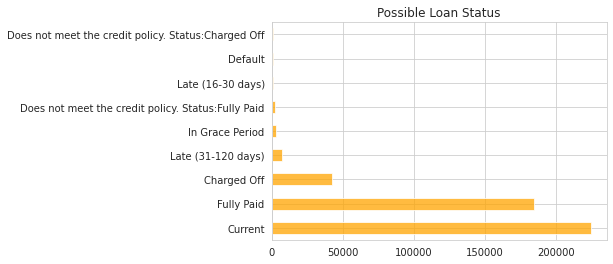

In [30]:
df['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()

**Inference :**  We can see that most of the data are of "current" loan status.

## **2.Loan Amount**

---




#### **Data Dictionary:** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [31]:
df['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [32]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,14518.758682,8373.184813,900.0,8000.0,12600.0,20000.0,35000.0
Current,224226.0,15177.366474,8420.944275,1000.0,8875.0,14000.0,20000.0,35000.0
Default,832.0,15284.885817,8311.439119,1000.0,9600.0,13675.0,20000.0,35000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.0,7750.0,12000.0,25000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.0,7200.0,12000.0,25000.0
Fully Paid,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0
In Grace Period,3146.0,16128.289892,8550.986001,1000.0,10000.0,15000.0,21000.0,35000.0
Late (16-30 days),1218.0,15800.779967,8737.787075,1000.0,9687.5,14400.0,21000.0,35000.0
Late (31-120 days),6900.0,15553.757246,8396.213429,1000.0,9600.0,14000.0,20000.0,35000.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  figlegend = self.fig.legend(handles, labels, **kwargs)


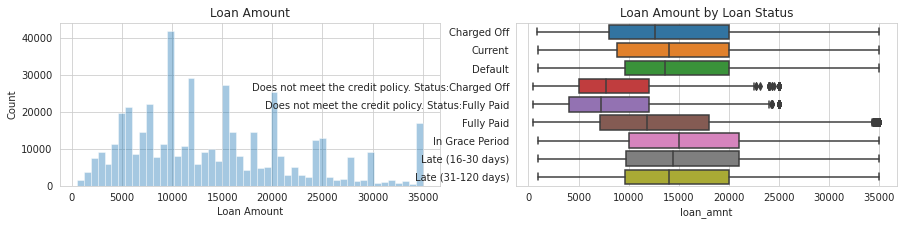

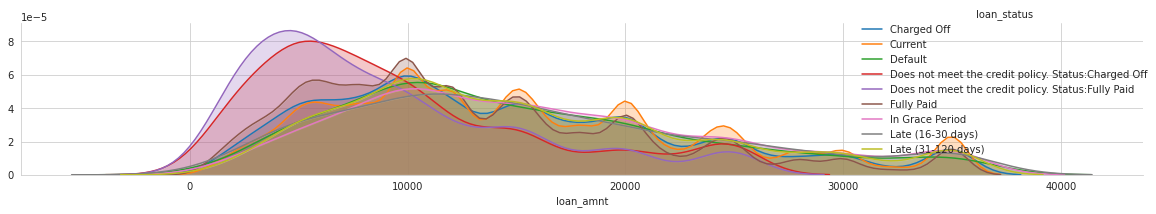

In [33]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

**Inference:** Loan amount ranges from 500 to 35000 with a mean of 13520. Comparing the summary statistics of loan status, we see that fully paid loans seems to have higher loan amount. However, we will dig deeper into this in later analysis.

## **3.Interest Rate**

---



---



#### **Data Dictionary:** "Interest Rate on the loan."

In [34]:
df['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [35]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,15.998834,4.290310,5.42,13.0600,15.80,18.9200,26.06
Current,224226.0,13.773271,4.325749,6.00,10.9900,13.65,16.2900,26.06
Default,832.0,16.136394,4.032109,6.49,13.3500,15.80,18.9900,26.06
Does not meet the credit policy. Status:Charged Off,761.0,14.597148,2.664766,7.43,12.8700,14.50,16.3200,21.64
Does not meet the credit policy. Status:Fully Paid,1988.0,13.978642,2.732150,6.00,12.3975,13.98,15.6800,21.64
Fully Paid,184739.0,13.255943,4.242014,5.42,10.1600,13.11,15.8000,26.06
In Grace Period,3146.0,15.827072,4.365028,6.00,12.9900,15.61,18.9200,26.06
Late (16-30 days),1218.0,15.964466,4.248670,6.03,12.9900,15.61,18.9725,26.06
Late (31-120 days),6900.0,15.947754,4.192149,6.00,12.9900,15.61,18.7500,26.06


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  figlegend = self.fig.legend(handles, labels, **kwargs)


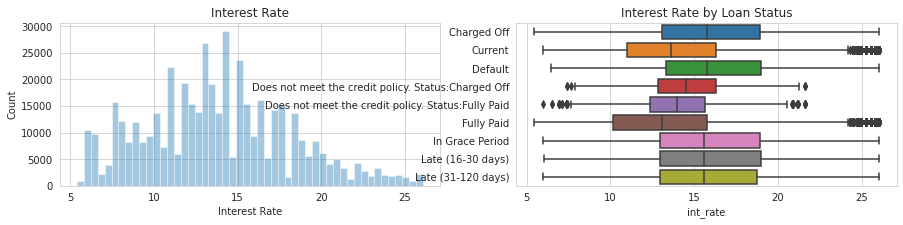

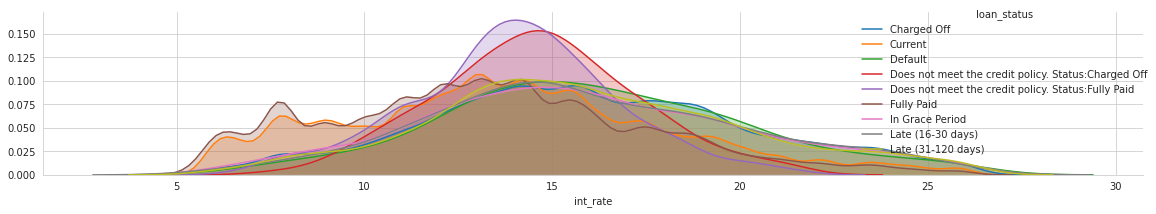

In [36]:
plot_var('int_rate', 'Interest Rate', continuous=True)

**Description:** From the description, Interest rate ranges from a maximum of 26% to a minimum of 5.4%. Comparing the summary statistics of Interest Rate and the graph,we can infer that the higher the interest rate is, the more likely for it to be charged off.

## **4.Grade and Subgrade**

---



**Data Description:** Loan Grades and Subgrades are assigned by Lending Club based on the borrower’s credit worthiness and also on some variables specific to that Loan.



In [0]:
grade_vis = df['grade'].value_counts()

Plotting the values

Text(0.5, 0, 'Count')

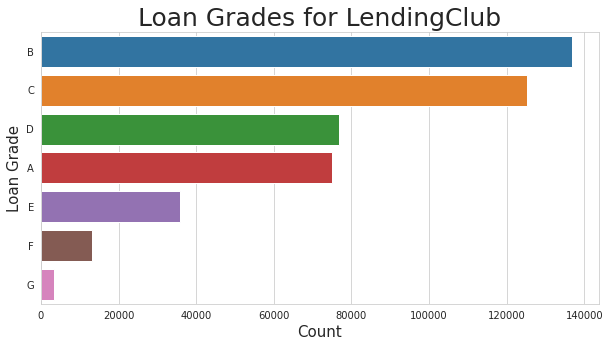

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

We see that majority of the loans are either in grade B or grade C, which together corresponds to about 50% of the loan population.

While there are a considerable amount of loans in Grade D and in Grade A, there is quite a small amount in Grade G which corresponds to uncollectible loans. 

This gives a good sign that Lending Club has less of uncollectible loans.


Looking more closely into Grade and Sub_Grade,

In [39]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [40]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


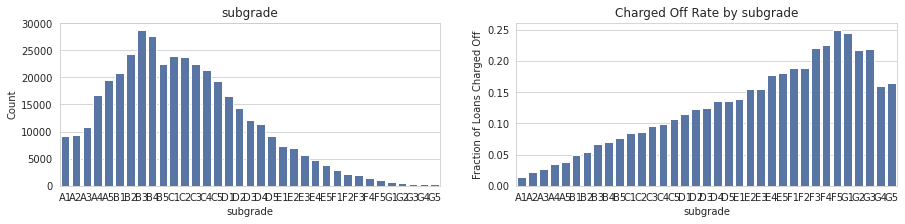

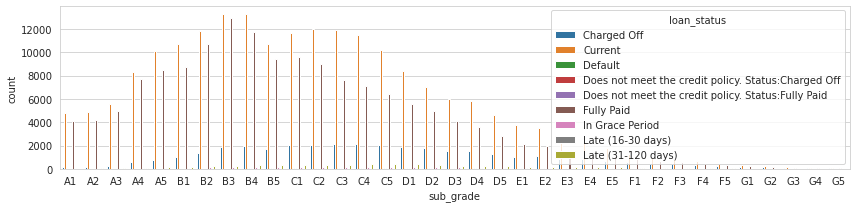

In [84]:
plot_var('sub_grade','subgrade',continuous=False)

**Inference:** from the above, we see that the grade is implied by subgrade.We can see a  trend of higher fraction of loans Charged off as the grade going from A to G though there are small variations among subgrades.

## **5.Purpose**

---



**Data Description:** Why are people requesting Loan? What were the most frequent loan purpose


We will segment the loan applications across the purpose of the loan. Purpose of the Loan seems to be affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

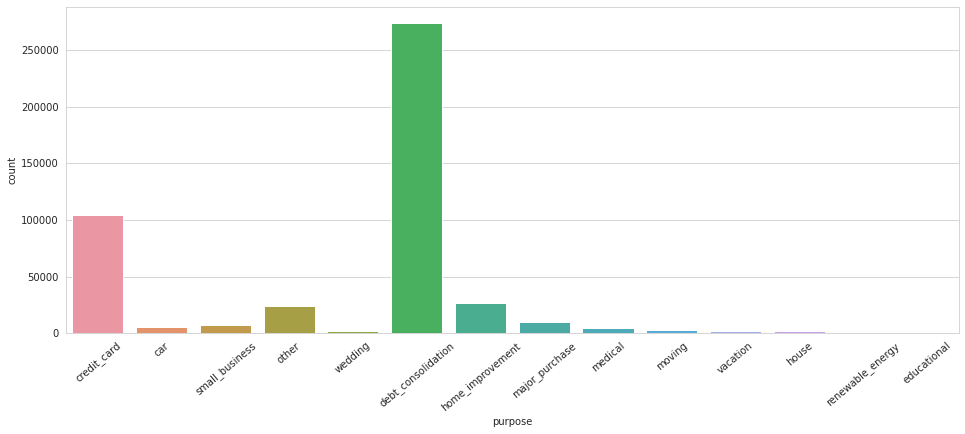

In [42]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df)
plt.show()

From the above graph we can see that debt consolidation is a clear winner for loan purpose with more than 1600k loans, followed by credit card loans and so on

Top 3 Loan Purpose 

*   Debt Consolidation
*   Credit Card Loans
*   Home Improvement


Let's analyse the top 3 types of loans based on purpose:

In [43]:
main_purposes = ["credit_card","debt_consolidation","home_improvement"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
Name: purpose, dtype: int64

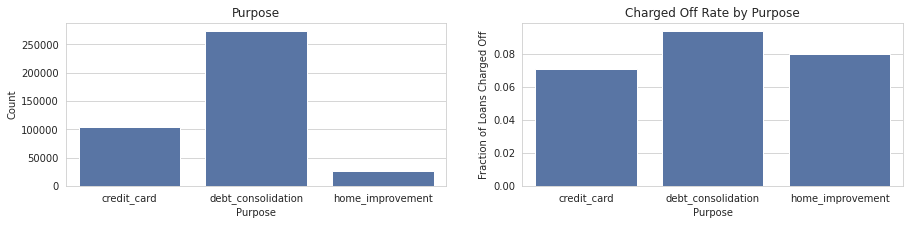

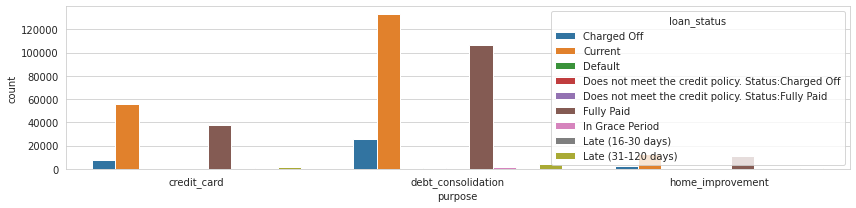

In [44]:
plot_var('purpose','Purpose',continuous=False)

**Inference:** We see that the highest fraction of loans that were charged off were due to debt consolidation purpose. Also, the borrowers with current loan status seem to have the highest count of debt consolidation. 

## **6.Installment**

---

**Data Dictionary:** "The monthly payment owed by the borrower if the loan originates."

In [45]:
df['installment'].describe()

count    404889.000000
mean        449.459423
std         239.661374
min          16.730000
25%         275.330000
50%         398.090000
75%         583.510000
max        1407.010000
Name: installment, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  figlegend = self.fig.legend(handles, labels, **kwargs)


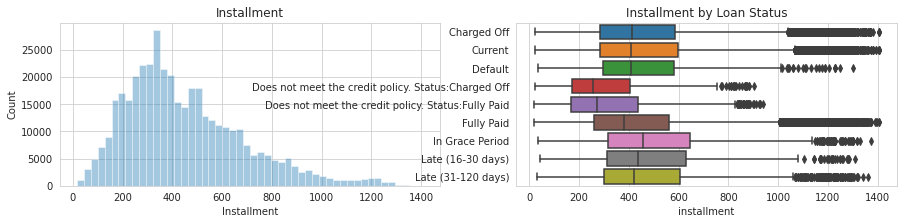

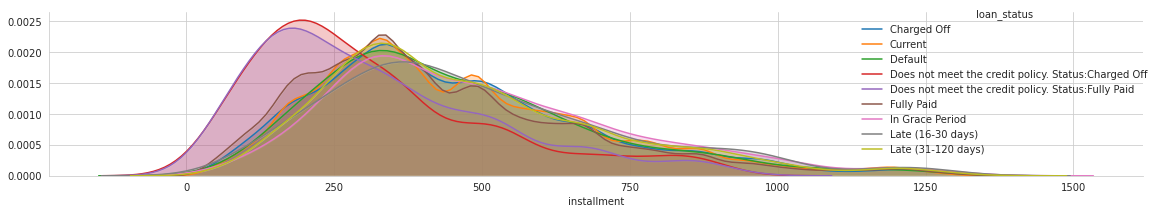

In [46]:
plot_var('installment', 'Installment', continuous=True)

In [47]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,35341.0,458.235627,241.277270,21.62,285.7800,410.660,586.9100,1407.01
Current,201479.0,460.945873,238.782799,22.24,285.4200,409.870,598.8900,1407.01
Default,735.0,460.535891,232.582987,33.21,294.6950,410.480,582.4900,1300.20
Does not meet the credit policy. Status:Charged Off,432.0,314.112662,201.477917,23.21,169.9425,256.835,404.6825,902.06
Does not meet the credit policy. Status:Fully Paid,1222.0,318.948592,200.173174,16.73,169.2750,271.395,435.4775,940.14
Fully Paid,155686.0,431.750421,238.994682,20.22,260.4900,381.030,559.4400,1407.01
In Grace Period,2794.0,499.482713,247.333287,32.74,316.4700,456.540,646.6725,1374.63
Late (16-30 days),1053.0,490.692156,252.075999,41.60,313.3000,436.740,629.2500,1309.49
Late (31-120 days),6147.0,475.363958,240.195816,31.52,300.8650,421.950,606.4100,1362.70


**Inference:** Installment amount ranges from a maximum of 1407 to minimum of 16.73. Charged-off loans tend to have higher installments but the difference of the mean values is very small

## **7.Home Ownership**

---


**Data Dictionary:** "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [48]:
df['home_ownership'].value_counts()

MORTGAGE    211162
RENT        158007
OWN          35557
OTHER          119
NONE            43
ANY              1
Name: home_ownership, dtype: int64

Replace "ANY" & "None" with "OTHER".

In [0]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace=True)

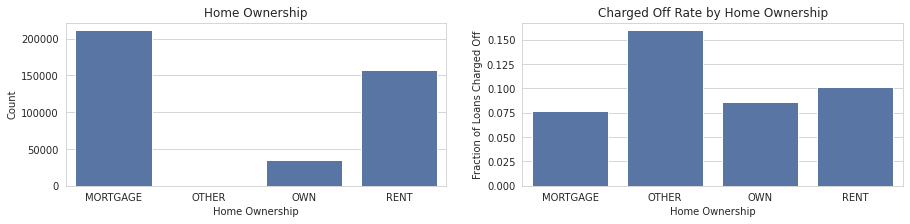

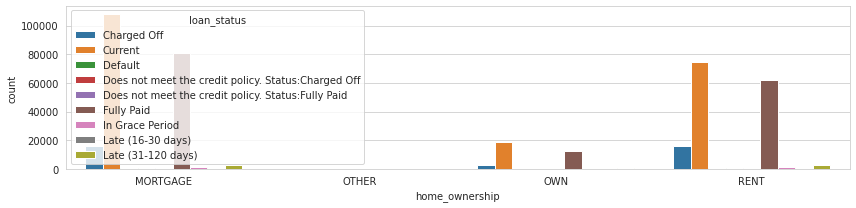

In [50]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [51]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.077069
OTHER       0.159509
OWN         0.085918
RENT        0.101173
Name: loan_status, dtype: float64

**Inference:** There appear to be small differences in charge-off rates by home ownership status. Mortgage & OTHER has slightly less probability of Charged-Off. Because of the large numbers of observations in each category, these differences might be statistically significant.

## **8.Term**

---
**Data Dictionary:** "The number of payments on the loan. Values are in months and can be either 36 or 60."


In [52]:
df['term'].value_counts(dropna=False)

36    289175
60    115714
Name: term, dtype: int64

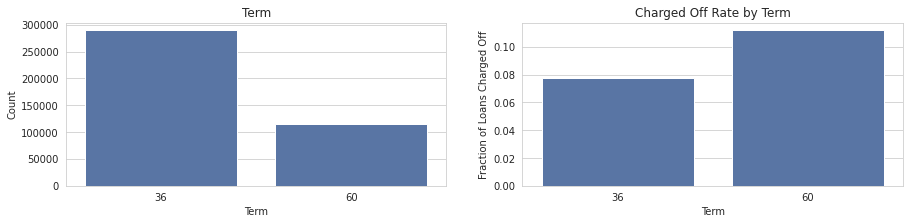

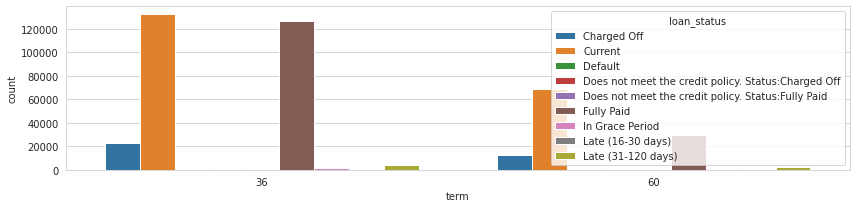

In [53]:
plot_var('term', 'Term', continuous=False)

In [85]:
df['term'].value_counts(normalize=True)

36    0.714208
60    0.285792
Name: term, dtype: float64

**Inference:** About 71% of the loans are 36 months and the rest are 60 months. The latter tends to have lower fraction of being fully paid.



## **9.Annual Income**

---
**Data Dictionary:** "The self-reported annual income provided by the borrower during registration."


In [54]:
df['annual_inc'].describe()

count    4.048890e+05
mean     7.351384e+04
std      5.370064e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.350000e+04
75%      8.900000e+04
max      7.446395e+06
Name: annual_inc, dtype: float64

In [0]:
df['annual_inc'] = df['annual_inc'].apply(lambda x:np.log10(x+1))

In [56]:
df['annual_inc'].describe()

count    404889.000000
mean          4.805960
std           0.222048
min           3.278067
25%           4.653222
50%           4.802781
75%           4.949395
max           6.871946
Name: annual_inc, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  figlegend = self.fig.legend(handles, labels, **kwargs)


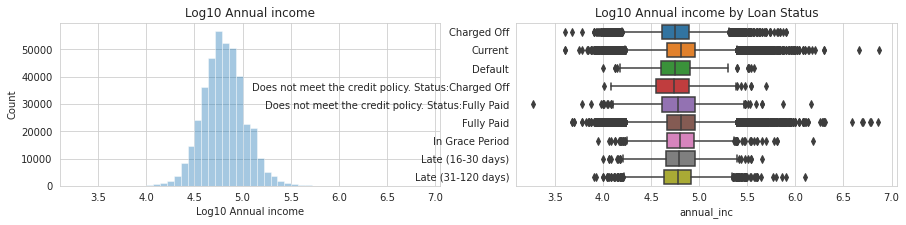

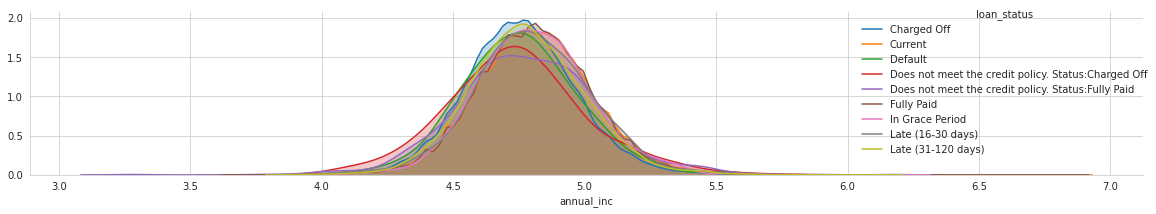

In [57]:
plot_var('annual_inc', 'Log10 Annual income', continuous=True)

**Inference:** Annual income ranges from \$1 to \$7.5M, with a median at \$63k, which doubles the national median individual income in the US (\$40k for males and \$25k for females). Due to the large range of variation, we log-transform the values. We can see that there are more number of outliers on the lower ends. 



## **10.Verification Status**

---
**Data Dictionary:** "Indicates if income was verified by [Lending Club], not verified, or if the income source was verified."


In [58]:
df['verification_status'].value_counts()

Verified           147779
Source Verified    132086
Not Verified       125024
Name: verification_status, dtype: int64

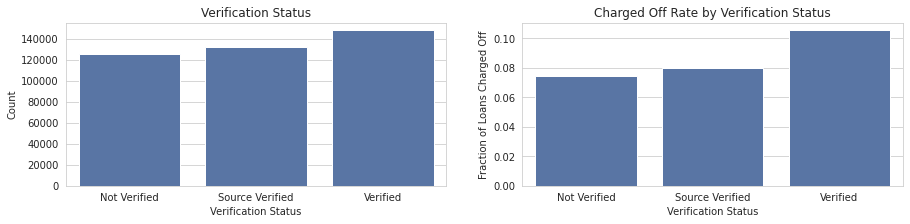

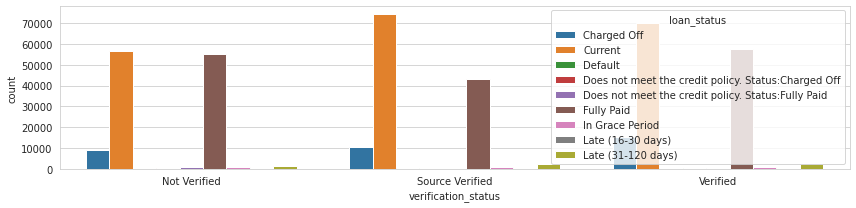

In [59]:
plot_var('verification_status', 'Verification Status', continuous=False)

**Inference:** Surprisingly, verified loans have higher chance of being charged-Off.

## **11.DEBT TO INCOME**

---


**Data Dictionary:** "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.""

In [60]:

df['dti'].describe()

count    404889.000000
mean         17.599636
std           7.724312
min           0.000000
25%          11.820000
50%          17.230000
75%          23.080000
max          39.990000
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

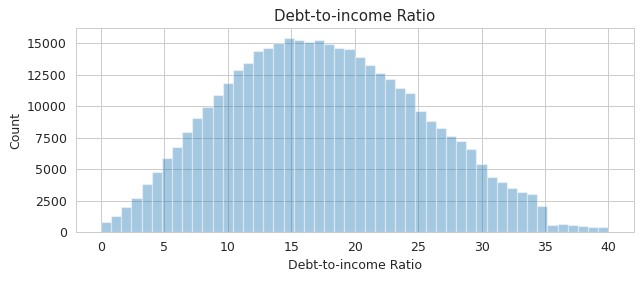

In [62]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [65]:
df.groupby('loan_status')['dti'].median()

loan_status
Charged Off                                            18.750
Current                                                17.860
Default                                                19.370
Does not meet the credit policy. Status:Charged Off    15.525
Does not meet the credit policy. Status:Fully Paid     15.985
Fully Paid                                             16.040
In Grace Period                                        19.035
Late (16-30 days)                                      18.680
Late (31-120 days)                                     19.120
Name: dti, dtype: float64

**Inference:** From the plot, we can see that there are fewer count when debt to income ratio is 40 and no outliers after that. Then we see how are the Charged off loans wrt Debt to income ratio.Default value is the highest. From this we can infer that the borrowers with highest debt to income ratio were defaulters.

**Checking Correlation between the few business features.**

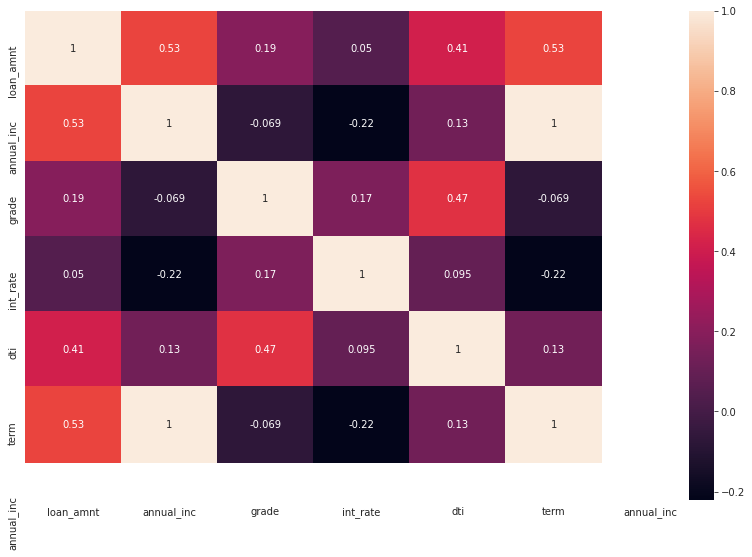

In [87]:
cor_df=df[['loan_amnt','annual_inc', 'grade','int_rate', 'dti', 'term','annual_inc']]
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(cor_df.corr(), 
            xticklabels=cor_df.columns.values,
            yticklabels=cor_df.columns.values,annot= True)
plt.show()

#**DATA PREPARATION:**

---



---



**"If you torture the data long enough, it will confess to anything"**

 That being said, along with all the insights gained from data cleaning, data analysis, Lets step into the next phase of credit risk analysis or might as well say, second phase of data torture - DATA PREPARATION 


## **Target and Predictor Variable :**

---
Dependent or Target variable - what we are going to predict. In our case, Loan Status.


Predictor variable - One or more variables that are used to determine(Predict) the 'Target Variable'.

Approach for constructing Independent Variable

1. **Fine classing :-** we will use fine classing method for turning continous variables into categories by bundling them up by there properties   

2. **Weight of Evidence :-** To what extent an independent variable would predict a dependent variable  
   **WOE = ln(% non default events/% default events)**
3.**Coarse classing :-** We will bundle variables that have similar weight of evidence
4.**Information Value:-** It calculates the prediction power of a feature


## **LOAN STATUS- Good or Bad?**

---



---


We are interested in the borrowers and the respective loans on which they have defaulted or not. Lets call the loans that have defaulted as bad loand and those which did not, as good loans thus making it imperative for us to decribe what default is. We will create a new variable in the data set of a boolean or binary type.Zero will stand for default or bad loan while one for a good loan.

The established practice is to categorize all the independent variables into the binary variables(dummy variables) or indicator variables.This kind data preparation makes it more understandable even people to layman. 

In [91]:
df['loan_status'].unique()

[Fully Paid, Current, Charged Off, Default, Late (31-120 days), In Grace Period, Late (16-30 days), Does not meet the credit policy. Status:Charge..., Does not meet the credit policy. Status:Fully ...]
Categories (9, object): [Fully Paid, Current, Charged Off, Default, ..., In Grace Period,
                         Late (16-30 days), Does not meet the credit policy. Status:Charge...,
                         Does not meet the credit policy. Status:Fully ...]

In [0]:
bad_loans = ['Charged Off', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']
df['good_bad'] = np.where(df['loan_status'].isin(bad_loans), 0, 1)

## **Test and Train Data**

---

Splitting the data into train and test data in 80:20 ratio.

In [0]:
from sklearn.model_selection import train_test_split
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(df.drop('good_bad', axis = 1), df[['good_bad']], test_size = 0.2, random_state = 50)

In [0]:
df_inputs = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

##**Weight of Evidence and Information Value**

---

The weight of evidence tells the predictive power of of the target variable in relation to the predictor variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. 

WOE = In(% of non-events ➗ % of events)

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :

IV = ∑ (% of non-events - % of events) * WOE



In [0]:
def get_woe_discrete(df,column_name, good_bad_variable_df):
    df = pd.concat([df[column_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [0]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'b')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [99]:
df_temp = get_woe_discrete(df_inputs, 'grade', df_targets_prepr)
df_temp.set_index('grade')

,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
grade,,,,,,,,,
G,1852,0.731102,0.005718,1354.0,498.0,0.004672,0.014610,-1.140139,0.305327
F,7888,0.755325,0.024352,5958.0,1930.0,0.020557,0.056620,-1.013143,0.305327
E,22884,0.806284,0.070649,18451.0,4433.0,0.063663,0.130050,-0.714316,0.305327
D,50934,0.847371,0.157247,43160.0,7774.0,0.148918,0.228063,-0.426228,0.305327
C,88578,0.886462,0.273464,78521.0,10057.0,0.270926,0.295039,-0.085261,0.305327
B,99129,0.924048,0.306038,91600.0,7529.0,0.316054,0.220876,0.358311,0.305327
A,52646,0.964556,0.162532,50780.0,1866.0,0.175210,0.054742,1.163348,0.305327
